In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

In [4]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [11]:
X = df_dummy.copy()
del X["charges"]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
sex_male            1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(1), int64(2), uint8(5)
memory usage: 38.0 KB


In [12]:
y = df.charges

In [13]:
X_train, X_test, y_train,y_test = model_selection.train_test_split(X,
                            y, test_size = 0.3, random_state = 1)

In [14]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
744,50,26.41,0,1,0,1,0,0
363,21,26.40,1,0,0,0,0,1
10,25,26.22,0,1,0,0,0,0
970,50,28.16,3,0,0,0,1,0
634,51,39.70,1,1,0,0,0,1


For every column (column wise)

Z = (x - mean(x))/sd(x)

Zero mean and 1 standard deviation

In [16]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train) #learns what is the mean and std for each column
X_train_std = scaler.transform(X_train) #applies mean and std to find Z
X_test_std = scaler.transform(X_test)

In [18]:
type(X_train_std)

numpy.ndarray

In [21]:
pd.DataFrame(X_train_std, columns=X.columns).head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.797152,-0.702114,-0.904002,0.976766,-0.509664,1.788102,-0.600387,-0.587220
1,-1.271085,-0.703758,-0.085679,-1.023787,-0.509664,-0.559252,-0.600387,1.702939
2,-0.985811,-0.733340,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,-0.587220
3,0.797152,-0.414510,1.550967,-1.023787,-0.509664,-0.559252,1.665591,-0.587220
4,0.868471,1.482037,-0.085679,0.976766,-0.509664,-0.559252,-0.600387,1.702939


In [22]:
pd.DataFrame(X_train_std, columns=X.columns).describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-1.791065e-16,-4.635418e-16,-2.910332e-16,1.767342e-17,8.979047e-17,-1.088873e-16,4.886879e-17,-2.372271e-17
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.485041e+00,-2.419524e+00,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
25%,-9.144925e-01,-7.247116e-01,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
50%,-5.867016e-02,-3.076297e-02,-8.567913e-02,9.767656e-01,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
75%,8.684707e-01,6.631857e-01,7.326440e-01,9.767656e-01,-5.096643e-01,-5.592522e-01,1.665591e+00,1.702939e+00
max,1.795612e+00,3.689196e+00,3.187613e+00,9.767656e-01,1.962076e+00,1.788102e+00,1.665591e+00,1.702939e+00


In [23]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

In [26]:
result = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})
result["error"] = result.actual - result.predicted
result.sample(10)

,actual,predicted,error
664,27037.91410,35600.174897,-8562.260797
1299,2710.82855,2083.498732,627.329818
200,2130.67590,3790.541142,-1659.865242
537,8825.08600,10096.018357,-1270.932357
383,5846.91760,11492.557166,-5645.639566
241,5354.07465,4747.310266,606.764384
1054,3353.47030,2373.775967,979.694333
1221,6593.50830,6545.882252,47.626048
91,10942.13205,10334.412496,607.719554
1112,24180.93350,33530.190666,-9349.257166


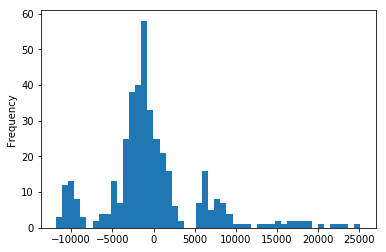

In [27]:
result.error.plot.hist(bins = 50)

In [29]:
mse = metrics.mean_squared_error(result.actual, result.predicted)
mse

36761456.352013245

In [30]:
rmse = np.sqrt(mse)
rmse

6063.122656850449